# 大数据原理技术第五次实验

学号:20337011   姓名:陈俊皓

## 实验要求
+ 实现K-means聚类算法
+ 从UCI数据集中找到合适的聚类测试集
+ 采用normalized mutual information（NMI）作为度量，对自己算法的聚类运行结果进行评估。

## 实验过程

### 加载数据集
此次选用手写数字的数据集进行聚类测试

In [1]:
import numpy as np
from sklearn.datasets import load_digits

digits_data=load_digits().data
print(digits_data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


数据可视化展示如下:

Random handwritten digit data: 


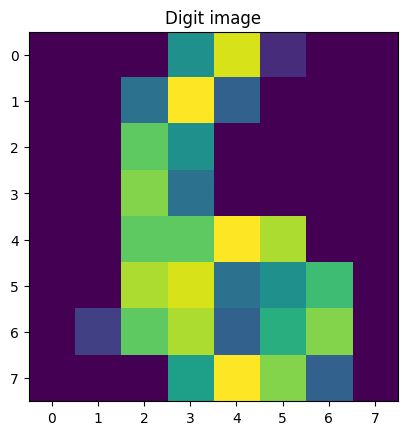

In [12]:
import matplotlib.pyplot as plt
import numpy as np

print("Random handwritten digit data: " )
sample_digit = digits_data[np.random.randint(0,len(digits_data))].reshape(8, 8)
plt.imshow(sample_digit)
plt.title("Digit image")
plt.show()

加载数据标签

In [6]:
from sklearn.preprocessing import scale

scaled_data=scale(digits_data)
print(scaled_data)

Y=load_digits().target
print(Y)

[[ 0.         -0.33501649 -0.04308102 ... -1.14664746 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  0.54856067 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  1.56568555  1.6951369
  -0.19600752]
 ...
 [ 0.         -0.33501649 -0.88456568 ... -0.12952258 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.67419451 ...  0.8876023  -0.5056698
  -0.19600752]
 [ 0.         -0.33501649  1.00877481 ...  0.8876023  -0.26113572
  -0.19600752]]
[0 1 2 ... 8 9 8]


### 定义KMeans聚类类

在该类中，拥有三个成员变量，分别为:聚类个数，最大迭代次数以及聚类中心。

In [8]:
import numpy as np

clusters=10


class KMeans:
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        
    def fit(self, X):
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        for i in range(self.max_iter):
            # Assign each data point to the closest centroid
            labels = self._assign_labels(X, self.centroids)
            
            # Update the centroids based on the mean of the data points
            new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(self.n_clusters)])
            
            # Check if the centroids have converged
            if np.allclose(new_centroids, self.centroids):
                break
                
            self.centroids = new_centroids
            
    def predict(self, X):
        return self._assign_labels(X, self.centroids)
    
    def _assign_labels(self, X, centroids):
        dists = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(dists, axis=0)

kmeans_cluster=KMeans(clusters,3000)

### 定义评测函数

In [9]:
from time import time
from sklearn import metrics

def bench_k_means(estimator, name, data):
    initial_time = time()
    estimator.fit(data)
    print("Initial-cluster: " + name)
    print("Time taken: {0:0.3f}".format(time() - initial_time))
    print("NMI: {0:0.3f}".format(
        metrics.normalized_mutual_info_score(Y, estimator.predict(data))))

## 实验结果

In [10]:
bench_k_means(estimator=kmeans_cluster, name="random", data=digits_data)

Initial-cluster: random
Time taken: 0.181
NMI: 0.729


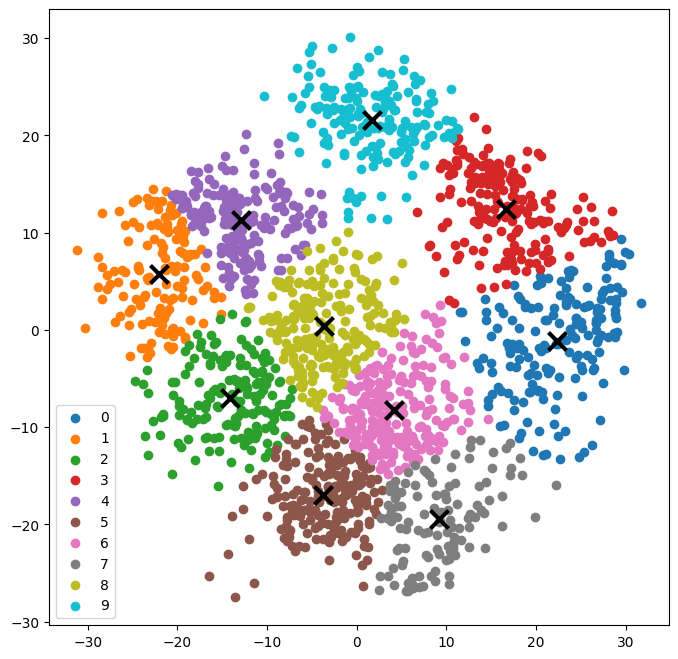

In [11]:
from sklearn.decomposition import PCA
import numpy as np
  
# Reducing the dataset
pca = PCA(2)
reduced_data = pca.fit_transform(digits_data)
kmeans_cluster.fit(reduced_data)
  
# Calculating the centroids
centroids = kmeans_cluster.centroids
label = kmeans_cluster.predict(reduced_data)
unique_labels = np.unique(label)
  
# plotting the clusters:
plt.figure(figsize=(8, 8))
for i in unique_labels:
    plt.scatter(reduced_data[label == i, 0],
                reduced_data[label == i, 1],
                label=i)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='k', zorder=10)
plt.legend()
plt.show()

## 实验心得
通过此次实验我学会了`KMeans`聚类方法的高效实现以及聚类结果的评测方式。